# Analysis Gyani

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
sheet_id = '1UWJfqZjEp5cO8ViZvGUiIKKqQEMa4JJsUH0G1LHbCik'

df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv')
df.head()

,Timestamp,¿Desea participar de la investigación?,Edad,Género,Años de Experiencia en la Clínica,Nivel de Educación MÁXIMO Adquirido,"En caso de haber respondido Terciario u otro, ¿cuál fue su título?",¿Cuál es tu título?,"En caso de haber respondido ""no tengo título universitario"", ¿cuál fue su título máximo adquirido?",Número de Horas por Semana Atendiendo Pacientes (Aproximado),...,¿Usted ha tenido formación universitaria pública o privada?,¿Le parecieron claras todas las preguntas?.1,"En el caso de que haya respondido NO, ¿cuál/es no le parecieron CLARAS y por qué?.1",¿Cree que alguna pregunta es inapropiada?.1,"En el caso de que haya respondido SÍ, ¿cuál/es no le parecieron APROPIADAS y por qué?",¿Considera que se podrían hacer otras preguntas que aporten información valiosa a lo que se intenta estudiar?.1,"En el caso de que haya respondido SÍ, ¿cuál/es?.1",¿Le gustaría agregar otro comentario?.1,Provincia de Residencia,"Considero fundamental el uso del consentimiento informado y lo uso siempre al tomar pacientes nuevos\n\n0 = No sabe/No contesta, 1 = Muy en desacuerdo , 4 = Ni de acuerdo ni en desacuerdo , 7 = Muy de acuerdo"
0,2/24/2023 17:49:30,Sí,41.0,Femenino,1.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,12.0,...,Privada,No,"Varias, no podria especificar",No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
1,2/24/2023 17:50:27,Sí,26.0,Femenino,0.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,13.0,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
2,2/24/2023 17:52:36,Sí,27.0,Femenino,1.0,Carrera de Especialización,NaN,Lic. en Psicología,NaN,30.0,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Ciudad Autónoma de Buenos Aires (CABA),NaN
3,2/24/2023 17:58:18,Sí,30.0,Masculino,1.3,Carrera de Especialización,NaN,Lic. en Psicología,NaN,35.0,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
4,2/24/2023 18:05:06,Sí,26.0,Masculino,2.0,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,46.0,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN


In [65]:
# convierto el valor 8 a 0
df = df.replace(8,0)

In [66]:
df.shape

(193, 73)

In [67]:
# renombrar todas las columnas
df = df.rename(columns = {
    '¿Desea participar de la investigación?':'participacion',

    # 1 datos demograficos
      'Edad': 'edad',
       'Género':'genero',
       'Años de Experiencia en la Clínica ':'experiencia_clinica',
       'Nivel de Educación MÁXIMO Adquirido':'educacion',
       'En caso de haber respondido Terciario u otro, ¿cuál fue su título?':'titulo_terciario',
       '¿Cuál es tu título?':'titulo',
       'En caso de haber respondido "no tengo título universitario", ¿cuál fue su título máximo adquirido?':'no_titulo_universitario',
       'Número de Horas por Semana Atendiendo Pacientes (Aproximado)':'horas_semana_pacientes_atendidos',
       'Contexto de Trabajo': 'contexto_trabajo',

       # 1 orientacion teo

       'Orientación Teórica':'orientacion_teo',
       'Indique qué disciplina realiza:':'marco_teo_terapia_basada_arte',
       'Indique qué marco teórico del psicoanálisis sigue usted:':'marco_teo_psa',
       'Indique qué marco teórico utiliza usted en la clínica:':'marco_teo_tcc',
       'Indique qué marco teórico utiliza en la práctica:':'marco_teo_humanista',
       'Indique qué tipo marco teórico utiliza en la práctica:':'marco_teo_eclectico',

       # 2 seccion (influencia factores en la orientacion teorico)
       'Evidencia Científica':'evidencia_cientifica',
       'Experiencia Personal con Consultantes (es decir la propia experiencia ejerciendo)':'experiencia_personal',
       'Entrenamiento Práctico en Clínica':'entrenamiento_clinica',
       'El tratamiento de Preferencia de los Consultantes ':'tratamiento_preferencia_consultantes',
        'Intuición':'intuicion',
       'Terapia Personal':'terapia_personal',

       # 3 seccion (fuentes para mejorar habilidades y efectividad en la clinica)
      'Experiencia Personal con Consultantes':'tratamiento_personal_consultantes',
       'Investigación Empírica con Ensayos Controlados ':'investigacion_empirica_ensayos_controlados',
        'Supervisión':'supervision',
       'Investigación Empírica de Estudios de Caso ':'estudios_de_caso',
        'Discusión con Pares':'discusion_pares',
       'Libros':'libros',
       'Observaciones de Casos Clínicos (por ejemplo en ateneos, prácticas, etc)':'observaciones_casos_clinicos',
       'Medidas de resultado (resultados de escalas, cuestionarios, etc)':'medidas_resultado',
       'Guías o manuales clínicos':'guias_manuales_clinicos',

       # 4 seccion (frases a valorar)
      'Estoy dispuesto a utilizar nuevos y diferentes tipos de terapia desarrollados por investigadores':'apertura_terapias_desarrolladas_por_investigadores',
       'Es mi deber profesional estar al día con los nuevos desarrollos en la investigación clínica (entendiendo a la investigación como un proceso que sigue el método científico)':'actualizacion_info_cientifica',
       'Mi formación clínica hizo énfasis en la investigación (entendiendo a la investigación como un proceso que sigue el método científico)':'formacion_enfasis_investigacion',
       'Mis supervisores requieren/han requerido que use tratamientos basados ​​en la evidencia (es decir, con apoyo del método científico)':'supervisores_terapia_evidencia_requerimiento',
       'Los tratamientos basados ​​en el método científico son eficientes/costo-efectivos ':'tratamientos_cientificos_eficientes',
       'Puedo atraer nuevos consultantes aprendiendo un tratamiento basado en evidencia (como resultado del método científico)':'atraer_consultantes_con_tbe',
       'Es importante incorporar los hallazgos científicos en mi práctica diaria':'hallazgos_cientificos_practica_diaria',
       'Intentaría una nueva terapia incluso si fuera muy diferente de lo que estoy acostumbrado a hacer (es decir muy diferente a lo que ejerzo)':'nueva_terapia_intento',
       'Estoy interesado en aprender tratamientos basados ​​en evidencia (como resultado del método científico)':'interes_aprender_tbe',
       'Los tratamientos que uso con mis consultantes tienen una base empírica (es decir cuentan con apoyo del método científico)':'tratamientos_utilizados_base_empirica',
       'Mis consultantes son más complejos y diversos que los de los ensayos clínicos (provenientes de la investigación científica, ejemplo ensayos aleatorizados y controlados)':'complejidad_consultantes_ensayos_clinicos',
       'Mis consultantes prefieren otros tratamientos que los tratamientos basados ​​en evidencia (como resultado del método científico)':'consultantes_prefieren_otros_tratamientos',
       'La terapia no puede ser manualizada':'terapia_manualizada',
       'Los diagnósticos utilizados en los ensayos clínicos son demasiado simples (ejemplo ensayos aleatorizados y controlados)':'diagnosticos_utilizados_son_simples',
       'Los tratamientos que prefiero no se han probado en un ensayo controlado aleatorio':'tratamientos_preferencia_no_probados_ensayo_controlado',
       'Tengo un enfoque de tratamiento individual para cada consultante':'enfoque_tratamiento_individual',
       'No tengo tiempo para aprender tratamientos basados ​​en evidencia (como resultado del método científico)':'no_tiempo_aprender_tbe',
       'La capacitación en tratamientos basados ​​en evidencia me costaría demasiado dinero (evidencia como resultado del método científico)':'capacitacion_tbe_demasiado_dinero',
       'No sé cuáles tratamientos están basados ​​en evidencia (como resultado del método científico)':'no_saber_tbe',
       'Mi entrenamiento clínico no proporcionó información suficiente sobre tratamientos basados ​​en evidencia (como resultado del método científico)':'entrenamiento_clinico_no_info_tbe',
       'La alianza terapéutica es más importante que aprender cómo hacer una forma específica de psicoterapia':'alianza_terapeutica_mas_importante',
       'La mayoría de las terapias son igualmente efectivas':'terapias_igualmente_efectivas',
       'Mi empleador no tiene los fondos para pagarme una capacitación en tratamientos basados ​​en evidencia (como resultado del método científico)':'empleador_no_fondos_capacitacion_tbe',
       'La experiencia clínica es más importante como guía para el tratamiento que la evidencia científica':'exp_clinica_+imp_que_evidencia_cientifica',

       # feedback
       '¿Le parecieron claras todas las preguntas?':'claridad_preguntas',
       'En el caso de que haya respondido NO, ¿cuál/es no le parecieron CLARAS y por qué?':'claridad_preguntas_comentario',
       '¿Cree que alguna pregunta es inapropiada?':'pregunta_inapropiada',
       'En el caso de que haya respondido NO, ¿cuál/es no le parecieron APROPIADAS y por qué?':'pregunta_inapropiada_comentario',
       '¿Considera que se podrían hacer otras preguntas que aporten información valiosa a lo que se intenta estudiar?':'preguntas_adicionales',
       'En el caso de que haya respondido SÍ, ¿cuál/es?':'preguntas_adicionales_sugerencias',
       '¿Le gustaría agregar otro comentario?':'comentario_extra',
       '¿Usted ha tenido formación universitaria pública o privada?':'formacion_publica_vs_privada',
       '¿Le parecieron claras todas las preguntas?.1':'claridad_preguntas_comentario2',
       'En el caso de que haya respondido NO, ¿cuál/es no le parecieron CLARAS y por qué?.1':'claridad_preguntas_comentario2',
       '¿Cree que alguna pregunta es inapropiada?.1':'pregunta_inapropiada2',
       'En el caso de que haya respondido SÍ, ¿cuál/es no le parecieron APROPIADAS y por qué?':'pregunta_inapropiada_comentario',
       '¿Considera que se podrían hacer otras preguntas que aporten información valiosa a lo que se intenta estudiar?.1':'preguntas_adicionales2',
       'En el caso de que haya respondido SÍ, ¿cuál/es?.1':'preguntas_adicionales_sugerencias2',
       '¿Le gustaría agregar otro comentario?.1':'comentario_extra2',

       # residencia y consentimiento informado
       'Provincia de Residencia':'provincia_residencia',
       'Considero fundamental el uso del consentimiento informado y lo uso siempre al tomar pacientes nuevos\n\n0 = No sabe/No contesta, 1 = Muy en desacuerdo , 4 = Ni de acuerdo ni en desacuerdo , 7 = Muy de acuerdo':'consentimiento_informado'
})
df.head()

,Timestamp,participacion,edad,genero,experiencia_clinica,educacion,titulo_terciario,titulo,no_titulo_universitario,horas_semana_pacientes_atendidos,...,formacion_publica_vs_privada,claridad_preguntas_comentario2,claridad_preguntas_comentario2,pregunta_inapropiada2,pregunta_inapropiada_comentario,preguntas_adicionales2,preguntas_adicionales_sugerencias2,comentario_extra2,provincia_residencia,consentimiento_informado
0,2/24/2023 17:49:30,Sí,41,Femenino,1.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,12,...,Privada,No,"Varias, no podria especificar",No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
1,2/24/2023 17:50:27,Sí,26,Femenino,0.2,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,13,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
2,2/24/2023 17:52:36,Sí,27,Femenino,1.0,Carrera de Especialización,NaN,Lic. en Psicología,NaN,30,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Ciudad Autónoma de Buenos Aires (CABA),NaN
3,2/24/2023 17:58:18,Sí,30,Masculino,1.3,Carrera de Especialización,NaN,Lic. en Psicología,NaN,35,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN
4,2/24/2023 18:05:06,Sí,26,Masculino,2.0,Licenciatura de Grado,NaN,Lic. en Psicología,NaN,46,...,Pública,Sí,NaN,No,NaN,No,NaN,NaN,Provincia de Buenos Aires,NaN


## Análisis Exploratorio

In [68]:
df.provincia_residencia.value_counts()

provincia_residencia
Provincia de Buenos Aires                                            75
Ciudad Autónoma de Buenos Aires (CABA)                               63
Córdoba                                                              11
La Rioja                                                              9
Mendoza                                                               7
Santa Fe                                                              6
Ciudad Autónoma de Buenos Aires (CABA), Provincia de Buenos Aires     3
Corrientes                                                            2
Neuquén                                                               2
Santiago del Estero                                                   2
Misiones                                                              2
Ciudad Autónoma de Buenos Aires (CABA), Entre Ríos                    1
Tierra del Fuego                                                      1
Formosa                                    

In [69]:
for col in df.columns: 
    print(col)

Timestamp
participacion
edad
genero
experiencia_clinica
educacion
titulo_terciario
titulo
no_titulo_universitario
horas_semana_pacientes_atendidos
contexto_trabajo
orientacion_teo
marco_teo_terapia_basada_arte
marco_teo_psa
marco_teo_tcc
marco_teo_humanista
marco_teo_eclectico
evidencia_cientifica
experiencia_personal
entrenamiento_clinica
tratamiento_preferencia_consultantes
intuicion
terapia_personal
tratamiento_personal_consultantes
investigacion_empirica_ensayos_controlados
supervision
estudios_de_caso
discusion_pares
libros
observaciones_casos_clinicos
medidas_resultado
guias_manuales_clinicos
apertura_terapias_desarrolladas_por_investigadores
actualizacion_info_cientifica
formacion_enfasis_investigacion
supervisores_terapia_evidencia_requerimiento
tratamientos_cientificos_eficientes
atraer_consultantes_con_tbe
hallazgos_cientificos_practica_diaria
nueva_terapia_intento
interes_aprender_tbe
tratamientos_utilizados_base_empirica
complejidad_consultantes_ensayos_clinicos
consultante

## Primera Sección

Datos demográficos y orientación teórica:

* 'edad'

* 'genero'

* 'experiencia_clinica'

* 'educacion'

* 'titulo_terciario'

* 'titulo'

* 'no_titulo_universitario'

* 'horas_semana_pacientes_atendidos'

* 'contexto_trabajo'

* 'orientacion_teo'

* 'marco_teo_terapia_basada_arte'

* 'marco_teo_psa'

* 'marco_teo_tcc'

* 'marco_teo_humanista'

* 'marco_teo_eclectico'

In [70]:
# edad media
df['edad'].mean()

34.78238341968912

In [71]:
# media de experiencia clinica
df.experiencia_clinica.mean()

6.746632124352332

In [72]:
# media de horas por semana en pacientes atendidos
df.horas_semana_pacientes_atendidos.mean()

24.569948186528496

In [73]:
# educacion
df.educacion.value_counts()

educacion
Licenciatura de Grado                                        99
Carrera de Especialización                                   63
Máster                                                       14
Doctorado                                                     6
Posdoctorado                                                  3
Posgrado                                                      2
Psicólogo + Cursos y formacion continua por cuenta propia     1
Residencia completa                                           1
Grado y Posgrados                                             1
Profesorado                                                   1
Varios posgrados con orientación psicoanalitica               1
Diplomatura y curso de posgrado                               1
Name: count, dtype: int64

In [74]:
# educacion publica o privada
df.formacion_publica_vs_privada.value_counts()

formacion_publica_vs_privada
Pública    121
Privada     69
Name: count, dtype: int64

In [75]:
# titulos
df.titulo.value_counts()

titulo
Lic. en Psicología                   185
Psicólogo                              1
Psicóloga                              1
Lic. en Terapia Ocupacional            1
Doctor en Psicología Clínica           1
Médico o Lic. en Ciencias Médicas      1
Psicologa (UNR)                        1
Lic. en Psicomotricidad                1
Psicopedagoga                          1
Name: count, dtype: int64

In [76]:
# ambito de trabajo
df.contexto_trabajo.value_counts()

contexto_trabajo
Ámbito Privado                                                                       115
Ámbito Privado, Obra Social o Prepaga                                                 33
Ámbito Público (hospital u otro), Ámbito Privado                                      24
Ámbito Público (hospital u otro)                                                       9
Ámbito Público (hospital u otro), Ámbito Privado, Obra Social o Prepaga                4
Obra Social o Prepaga                                                                  2
Particular                                                                             1
Ámbito Privado, Obra Social o Prepaga, Hospital privado que trabaja con prepagas       1
Ámbito Público (hospital u otro), Ámbito Privado, Docencia y clinica                   1
Ámbito Privado,                                                                        1
Ámbito Privado, Fundación sin fines de lucro                                           1
Ámbi

In [77]:
# orientacion teo
df.orientacion_teo.value_counts()

orientacion_teo
Terapias Cognitivas/Comportamentales        103
Psicoanálisis                                48
Ecléctico (más de una de estas opciones)     20
Sistémica                                    11
Psicodinámica                                 4
Humanista                                     2
Emdr                                          1
Pscicocorporal                                1
Emdr/ cognitiva                               1
Psicocorporal                                 1
Tcc+ contextuales                             1
Name: count, dtype: int64

## Segunda Sección

La influencia de estos factores a la hora de elegir su orientación teórica:

* 'evidencia_cientifica'

* 'experiencia_personal'

* 'entrenamiento_clinica'

* 'tratamiento_preferencia_consultantes'
       
* 'intuicion'

* 'terapia_personal'



**El puntaje es así:**

0 = No sabe/No contesta
1 = Nada Influyente a 7 = Extremadamente Influyente


Reemplazo por valores Nan los valores 0  

In [78]:
columnas = ['evidencia_cientifica', 'experiencia_personal', 'entrenamiento_clinica', 
            'tratamiento_preferencia_consultantes', 'intuicion', 'terapia_personal']

for columna in columnas:
    df[columna] = df[columna].replace(0, np.nan)

### PSA

In [79]:
psa = df[df['orientacion_teo']=='Psicoanálisis']
psa.shape

(48, 73)

In [80]:
second_section_psa = psa[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

### TCC

In [81]:
tcc = df[df['orientacion_teo']=='Terapias Cognitivas/Comportamentales']
tcc.shape

(103, 73)

In [82]:
second_section_tcc = tcc[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

### ECLECTICO

In [83]:
eclectico = df[df['orientacion_teo']=='Ecléctico (más de una de estas opciones)']
eclectico.shape

(20, 73)

In [84]:
second_section_eclectico = eclectico[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

### SISTEMICO

In [85]:
sist = df[df['orientacion_teo'] =='Sistémica']

In [86]:
second_section_sist = sist[['evidencia_cientifica','experiencia_personal','entrenamiento_clinica',
                      'tratamiento_preferencia_consultantes','intuicion','terapia_personal']].mean()

# DF para Segunda Section

In [87]:
df.orientacion_teo.value_counts()

orientacion_teo
Terapias Cognitivas/Comportamentales        103
Psicoanálisis                                48
Ecléctico (más de una de estas opciones)     20
Sistémica                                    11
Psicodinámica                                 4
Humanista                                     2
Emdr                                          1
Pscicocorporal                                1
Emdr/ cognitiva                               1
Psicocorporal                                 1
Tcc+ contextuales                             1
Name: count, dtype: int64

In [88]:
# dataframe
df2 = {
    'PSA': second_section_psa.round(2),
    'TCC': second_section_tcc.round(2),
    'ECLECTICO': second_section_eclectico.round(2),
    'SISTEMICA': second_section_sist.round(2)
}

df2 = pd.DataFrame(df2)
df2

,PSA,TCC,ECLECTICO,SISTEMICA
evidencia_cientifica,3.86,6.59,4.85,5.73
experiencia_personal,5.96,5.18,5.47,4.91
entrenamiento_clinica,6.11,5.16,4.85,5.73
tratamiento_preferencia_consultantes,4.07,3.35,3.47,3.64
intuicion,3.57,3.09,3.42,2.82
terapia_personal,6.40,4.31,4.28,4.00


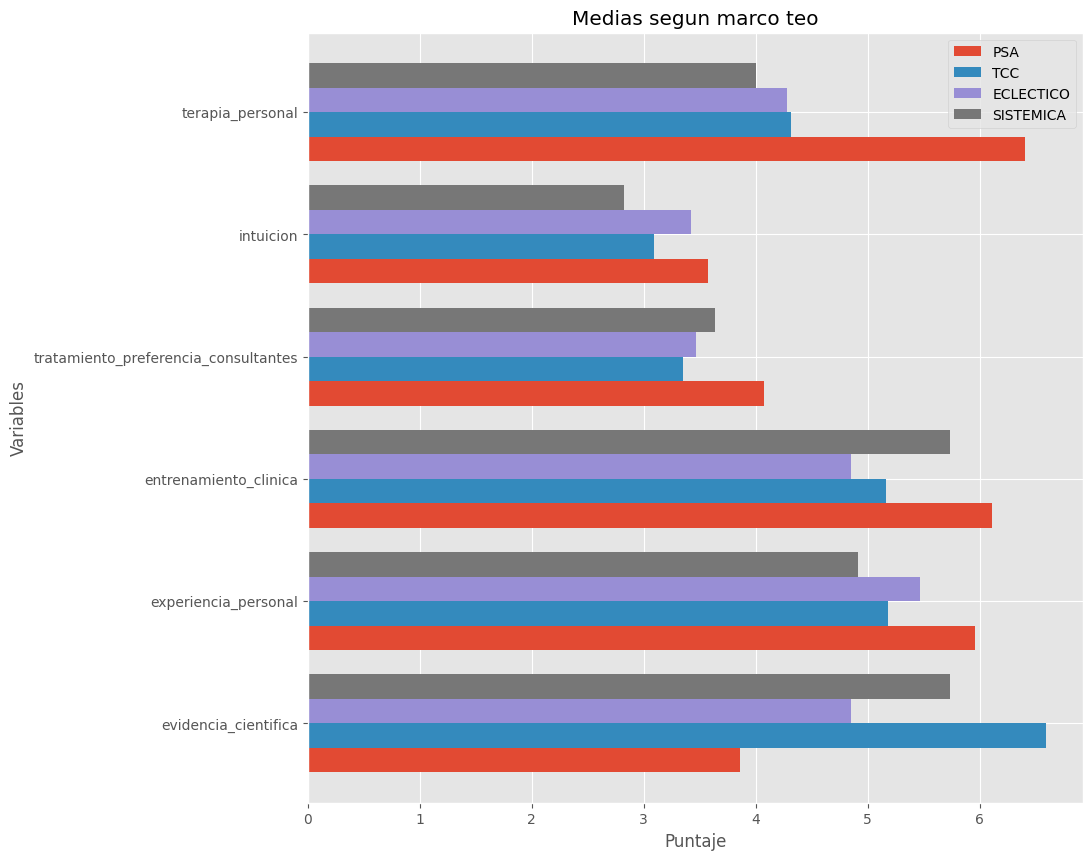

In [89]:
ax = df2.plot(kind='barh', figsize=(10,10), width=0.8)

ax.set_xlabel('Puntaje')
ax.set_ylabel('Variables')
ax.set_title('Medias segun marco teo')
plt.show()

In [90]:
columnas = ['evidencia_cientifica', 'experiencia_personal', 'entrenamiento_clinica', 
            'tratamiento_preferencia_consultantes', 'intuicion', 'terapia_personal', 
            'orientacion_teo']

df_subset = df[columnas]

In [91]:
print(df['orientacion_teo'].unique())

['Ecléctico (más de una de estas opciones)'
 'Terapias Cognitivas/Comportamentales' 'Psicoanálisis' 'Emdr' 'Sistémica'
 'Pscicocorporal' 'Psicodinámica' 'Emdr/ cognitiva ' 'Psicocorporal'
 'Humanista' 'Tcc+ contextuales']


In [92]:
subset = ['Ecléctico (más de una de estas opciones)', 'Terapias Cognitivas/Comportamentales', 'Psicoanálisis', 'Sistémica']

df_subset = df_subset[df_subset['orientacion_teo'].isin(subset)]

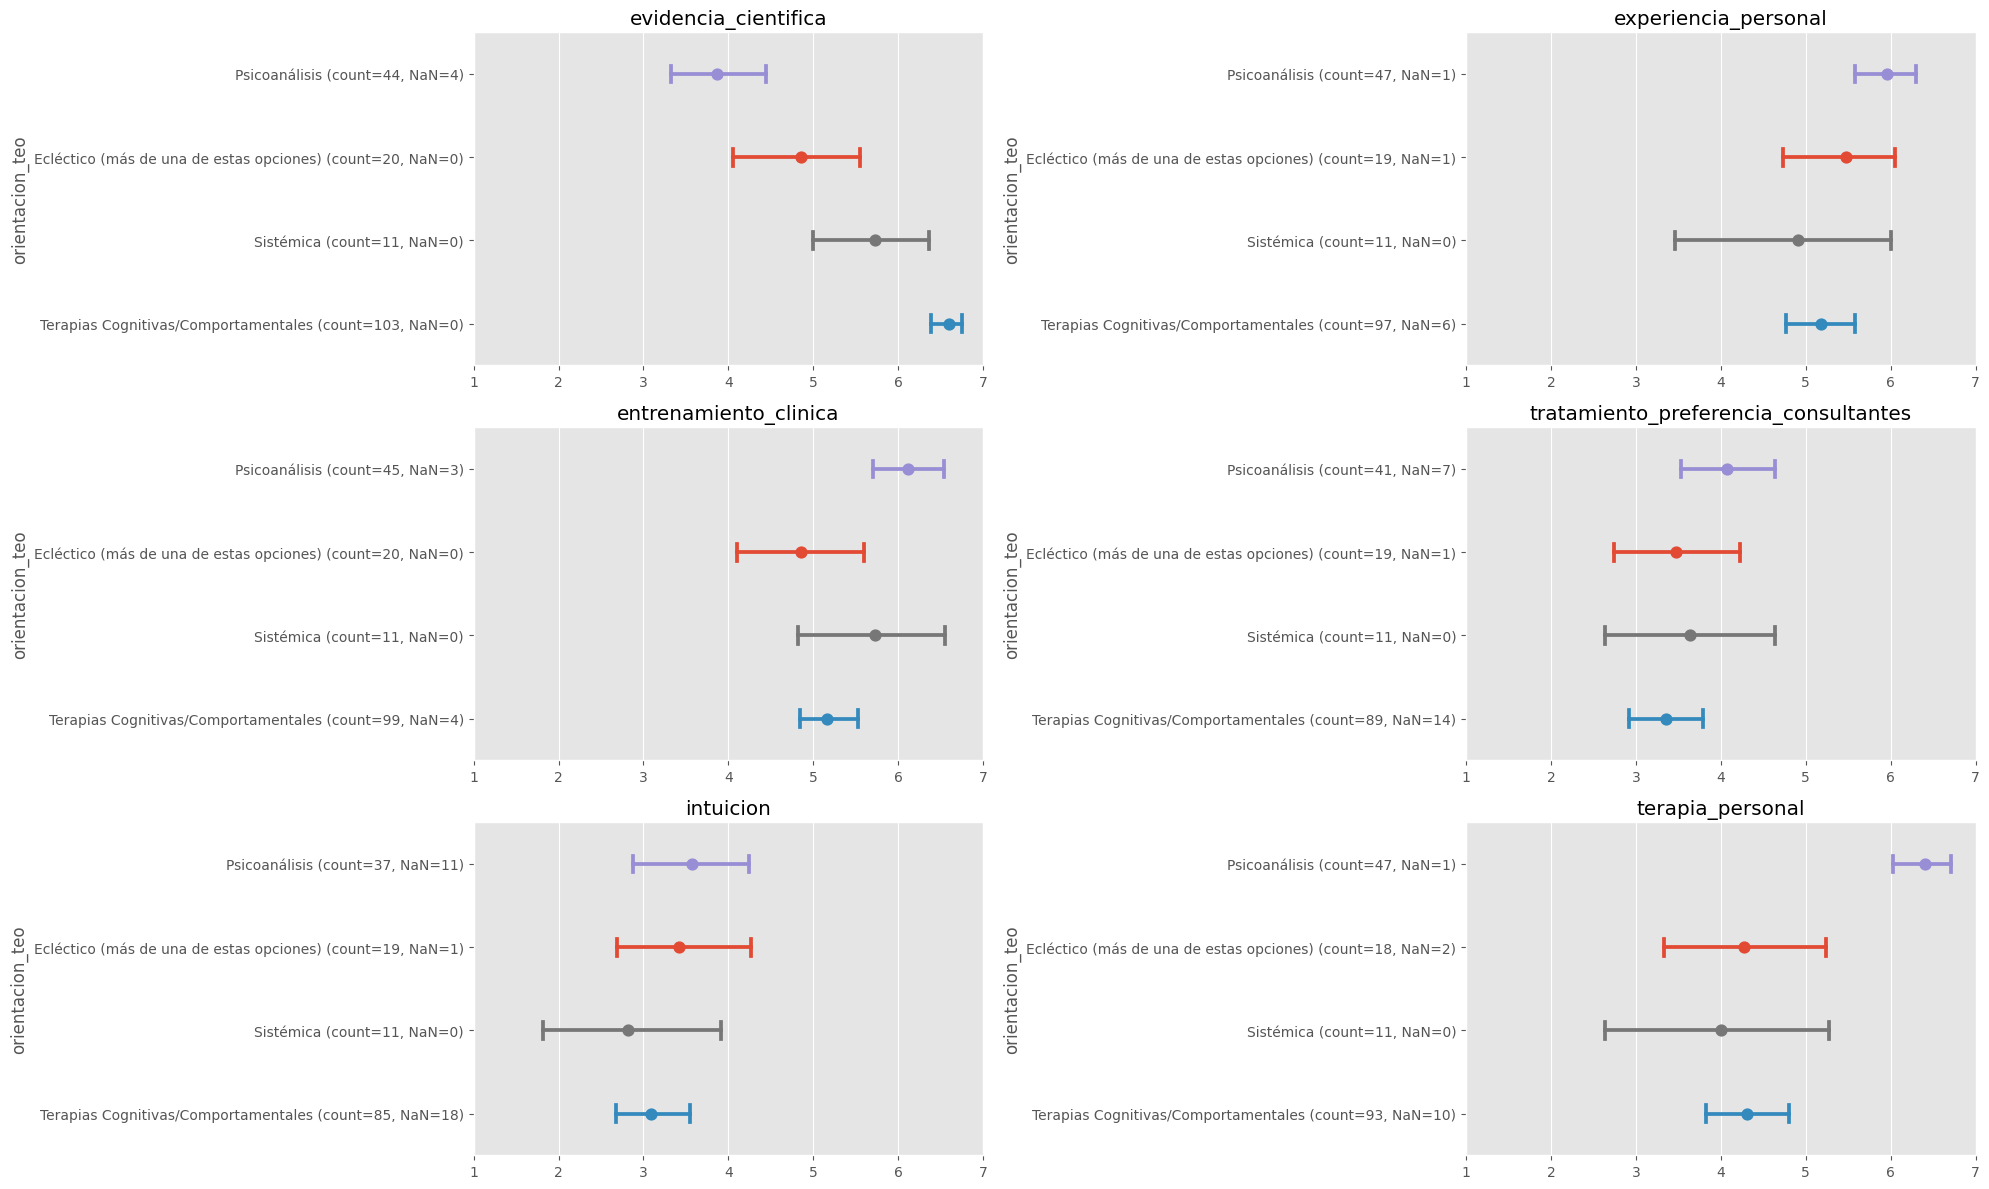

In [93]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables for which you want to create boxplots
variables = ['evidencia_cientifica', 'experiencia_personal', 'entrenamiento_clinica',
             'tratamiento_preferencia_consultantes', 'intuicion', 'terapia_personal']

# Define the number of columns for your subplot grid
num_cols = 2

# Calculate the number of rows needed in the subplot grid
num_rows = math.ceil(len(variables) / num_cols)

# Original order of y-axis labels
original_y_order = ['Psicoanálisis', 'Ecléctico (más de una de estas opciones)', 'Sistémica', 'Terapias Cognitivas/Comportamentales']

# Create a subplot grid of the appropriate size (made smaller)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,4*num_rows))
fig.subplots_adjust(hspace=0.5)

# Flatten the array of axes, so we can easily iterate over it
axs = axs.flatten()

for i, var in enumerate(variables):
    # Count the number of data points and NaNs for each 'orientacion_teo' value
    counts = df_subset.groupby('orientacion_teo')[var].count()
    nan_counts = df_subset[df_subset[var].isna()].groupby('orientacion_teo').size()

    # Plot the pointplot
    sns.pointplot(x=var, y='orientacion_teo', hue='orientacion_teo', data=df_subset, orient="h", join=False, capsize=0.2, ax=axs[i], order=original_y_order)
    axs[i].get_legend().remove()  # Remove legend from each subplot
    axs[i].set_title(f'{var}')
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].set_xlim(1, 7)  # Set x-axis limits to be between 1 and 7

    # Get the current y-axis labels
    current_labels = axs[i].get_yticklabels()

    # Update y-axis labels with counts and NaN counts included
    new_labels = [f"{label.get_text()} (count={counts.get(label.get_text(), 0)}, NaN={nan_counts.get(label.get_text(), 0)})" for label in current_labels]
    axs[i].set_yticklabels(new_labels)

# Remove unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [94]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Drop NaNs from the data
df_subset_clean = df_subset.dropna()

# List of variables for which you want to perform one-way MANOVA
dependent_vars = ['evidencia_cientifica', 'experiencia_personal', 'entrenamiento_clinica',
             'tratamiento_preferencia_consultantes', 'intuicion', 'terapia_personal']

# Define dependent and independent variables
X = df_subset_clean['orientacion_teo']
Y = df_subset_clean[dependent_vars]

# Perform one-way MANOVA
maov = MANOVA.from_formula('orientacion_teo ~ ' + ' + '.join(dependent_vars), data=df_subset_clean)

print(maov.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF         F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 4.0000 120.0000 -1930114126015956.7500 1.0000
         Pillai's trace               1.0000 4.0000 120.0000 -1930114126015956.7500 1.0000
 Hotelling-Lawley trace -64337137533865.2266 4.0000 120.0000 -1930114126015956.5000 1.0000
    Roy's greatest root -64337137533865.2266 4.0000 120.0000 -1930114126015956.7500 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

- evidencia_cientifica has a p-value of 0.0000, indicating a significant effect of orientacion_teo on this variable.
- experiencia_personal has a p-value of 0.1611, indicating that orientacion_teo does not significantly affect this variable (assuming an alpha level of 0.05).
- entrenamiento_clinica has a p-value of 0.0116, suggesting a significant effect.
- tratamiento_preferencia_consultantes has a p-value of 0.3477, indicating no significant effect.
- intuicion has a p-value of 0.8699, indicating no significant effect.
- terapia_personal has a p-value of 0.0003, indicating a significant effect.

In [95]:
import statsmodels.stats.multicomp as multi

# 'evidencia_cientifica'
mc1 = multi.MultiComparison(df_subset_clean['evidencia_cientifica'], df_subset_clean['orientacion_teo'])
res1 = mc1.tukeyhsd()
print('evidencia_cientifica')
print(res1.summary())
print()

# 'entrenamiento_clinica'
mc2 = multi.MultiComparison(df_subset_clean['entrenamiento_clinica'], df_subset_clean['orientacion_teo'])
res2 = mc2.tukeyhsd()
print('entrenamiento_clinica')
print(res2.summary())
print()

# 'terapia_personal'
mc3 = multi.MultiComparison(df_subset_clean['terapia_personal'], df_subset_clean['orientacion_teo'])
res3 = mc3.tukeyhsd()
print('terapia_personal')
print(res3.summary())

evidencia_cientifica
                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
                 group1                                 group2                meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------------------------------
Ecléctico (más de una de estas opciones)                        Psicoanálisis  -0.6471 0.4469 -1.7782 0.4841  False
Ecléctico (más de una de estas opciones)                            Sistémica   1.0802 0.2125 -0.3616 2.5221  False
Ecléctico (más de una de estas opciones) Terapias Cognitivas/Comportamentales   1.8529    0.0  0.8482 2.8577   True
                           Psicoanálisis                            Sistémica   1.7273 0.0046  0.4139 3.0407   True
                           Psicoanálisis Terapias Cognitivas/Comportamentales      2.5    0.0  1.6903 3.3097   True
                               Sistémica Terapias C

## Analysis Report
We have performed a one-way Multivariate Analysis of Variance (MANOVA) followed by a post-hoc analysis using the Bonferroni correction for multiple comparisons on our dataset. The results are as follows:

### Evidence Cientifica (Scientific Evidence)
The one-way MANOVA revealed that there is a significant difference in means of scientific evidence scores across the different orientations (p < 0.001). The post-hoc Bonferroni corrected test showed a significant difference between the group "Eclectic (more than one of these options)" and "Cognitive/Behavioral Therapies" (mean difference = 1.85, p < 0.001), as well as between "Psychoanalysis" and "Cognitive/Behavioral Therapies" (mean difference = 2.50, p < 0.001). However, there were no significant differences between the other groups.

### Entrenamiento Clinica (Clinical Training)
The MANOVA revealed that there is a significant difference in means of clinical training scores across the different orientations (p = 0.0116). The post-hoc test showed a significant difference between the group "Eclectic (more than one of these options)" and "Psychoanalysis" (mean difference = 1.60, p = 0.0097). However, there were no significant differences between the other groups.

### Terapia Personal (Personal Therapy)
The MANOVA test revealed a significant difference in means of personal therapy scores across the different orientations (p < 0.001). The post-hoc test showed significant differences between "Eclectic (more than one of these options)" and "Psychoanalysis" (mean difference = 2.21, p = 0.0049), "Psychoanalysis" and "Systemic" (mean difference = -2.50, p = 0.0064), and "Psychoanalysis" and "Cognitive/Behavioral Therapies" (mean difference = -2.22, p < 0.001). There were no significant differences between the other groups.

## Conclusion
This analysis reveals that there are significant differences in the means of scientific evidence, clinical training, and personal therapy scores across different theoretical orientations. Psychoanalysis seems to score significantly different in all three categories when compared to other orientations, notably "Cognitive/Behavioral Therapies". This suggests that the theoretical orientation of therapists can influence their views and utilization of scientific evidence, their clinical training, and their approach to personal therapy.

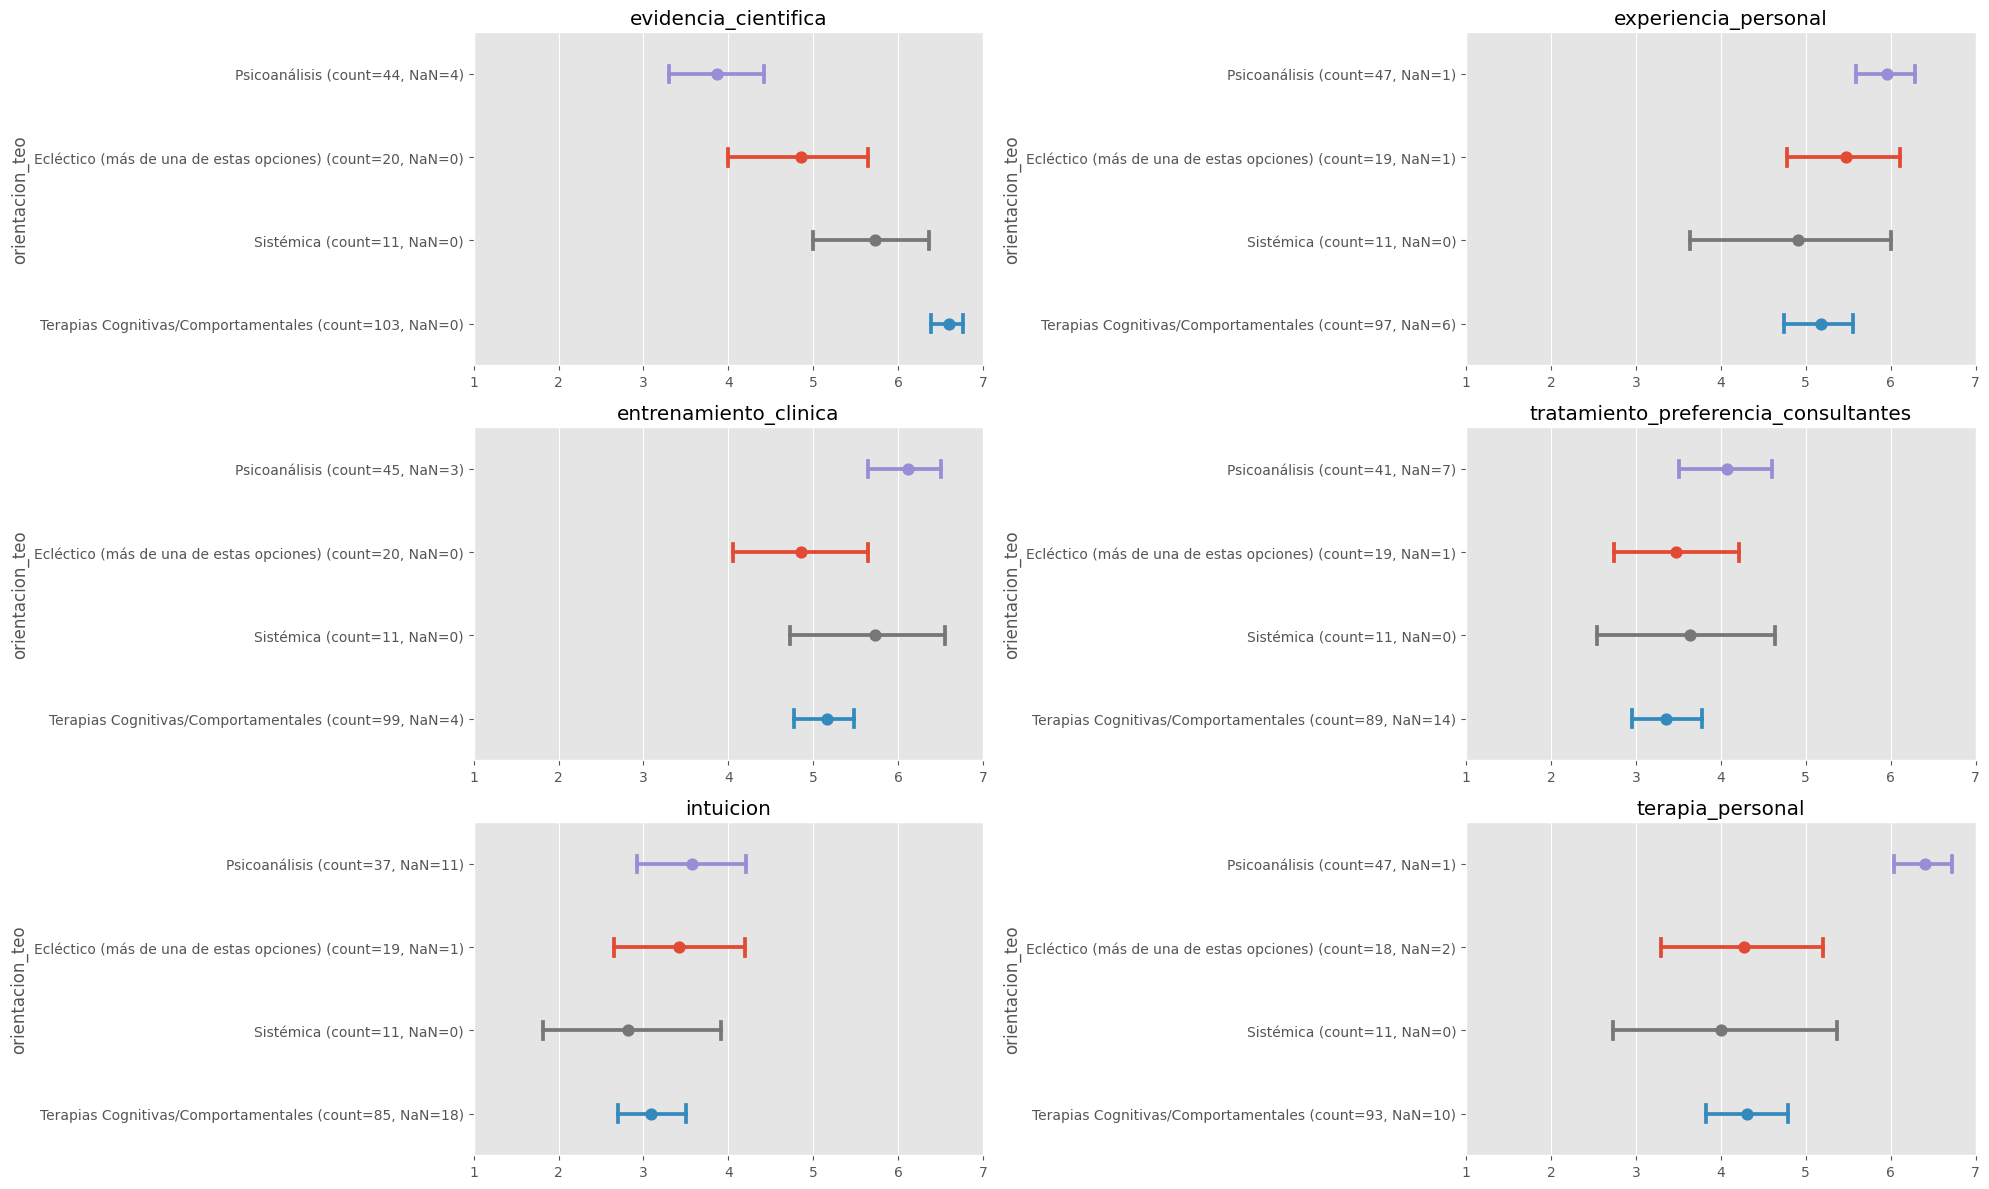

In [96]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables for which you want to create boxplots
variables = ['evidencia_cientifica', 'experiencia_personal', 'entrenamiento_clinica',
             'tratamiento_preferencia_consultantes', 'intuicion', 'terapia_personal']

# Define the number of columns for your subplot grid
num_cols = 2

# Calculate the number of rows needed in the subplot grid
num_rows = math.ceil(len(variables) / num_cols)

# Original order of y-axis labels
original_y_order = ['Psicoanálisis', 'Ecléctico (más de una de estas opciones)', 'Sistémica', 'Terapias Cognitivas/Comportamentales']

# Create a subplot grid of the appropriate size (made smaller)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,4*num_rows))
fig.subplots_adjust(hspace=0.5)

# Flatten the array of axes, so we can easily iterate over it
axs = axs.flatten()

# Create a dictionary to hold the offset for each pair of groups
offset_dict = {}
for group1 in original_y_order:
    for group2 in original_y_order:
        if group1 != group2:
            pair = tuple(sorted([group1, group2]))
            if pair not in offset_dict:
                offset_dict[pair] = 0
            else:
                offset_dict[pair] += 0.1  # Increase the offset for each subsequent comparison of the same pair of groups

for i, var in enumerate(variables):
    # Count the number of data points and NaNs for each 'orientacion_teo' value
    counts = df_subset.groupby('orientacion_teo')[var].count()
    nan_counts = df_subset[df_subset[var].isna()].groupby('orientacion_teo').size()

    # Plot the pointplot
    sns.pointplot(x=var, y='orientacion_teo', hue='orientacion_teo', data=df_subset, orient="h", join=False, capsize=0.2, ax=axs[i], order=original_y_order)
    axs[i].get_legend().remove()  # Remove legend from each subplot
    axs[i].set_title(f'{var}')
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].set_xlim(1, 7)  # Set x-axis limits to be between 1 and 7

    # Get the current y-axis labels
    current_labels = axs[i].get_yticklabels()

    # Update y-axis labels with counts and NaN counts included
    new_labels = [f"{label.get_text()} (count={counts.get(label.get_text(), 0)}, NaN={nan_counts.get(label.get_text(), 0)})" for label in current_labels]
    axs[i].set_yticklabels(new_labels)
    
    # Annotate the plot with the significant post hoc results
    if var in significant_diff:
        for k, pair in enumerate(significant_diff[var]):
            # Create the coordinates for the annotation
            y1 = original_y_order.index(pair[0])
            y2 = original_y_order.index(pair[1])
            x = axs[i].get_xlim()[1] - 0.1 * (axs[i].get_xlim()[1] - axs[i].get_xlim()[0])  # 10% to the left from the right y-axis

            # Retrieve the offset for this pair of groups
            pair = tuple(sorted(pair))  # Ensure the pair is in the same order as in the offset dictionary
            offset = offset_dict[pair]

            # Add the significance annotation and line
            axs[i].annotate("", xy=(x, y1+offset), xycoords='data',
                            xytext=(x, y2+offset), textcoords='data',
                            arrowprops=dict(arrowstyle="-", lw=1.5, color='black'))  # Add 'color' attribute here
            axs[i].text(x, min(y1+offset, y2+offset) + abs(y1-y2)/2, "*", ha='center', va='center', color='red', fontsize=20)

# Remove unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



## Tercer Sección

Fuentes utilizadas para mejorar las habilidades y efectividad en la clínica:

* 'tratamiento_personal_consultantes'

* 'investigacion_empirica_ensayos_controlados'
* 'supervision'

* 'estudios_de_caso'

* 'discusion_pares'

* 'libros'

* 'observaciones_casos_clinicos'

* 'medidas_resultado'

* 'guias_manuales_clinicos'

0 = No sabe/No contesta, 1 = Nunca , 4 = A veces, 7 = Siempre

### PSA

In [97]:
third_section_psa = psa[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',\
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',\
                         'medidas_resultado','guias_manuales_clinicos']].mean()

### TCC

In [98]:
third_section_tcc = tcc[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',
                         'medidas_resultado','guias_manuales_clinicos']].mean()

### ECLECTICO

In [99]:
third_section_eclectico = eclectico[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',
                         'medidas_resultado','guias_manuales_clinicos']].mean()

### SISTEMICA

In [100]:
third_section_sist = sist[['tratamiento_personal_consultantes','investigacion_empirica_ensayos_controlados',
                         'supervision','estudios_de_caso','discusion_pares','libros','observaciones_casos_clinicos',
                         'medidas_resultado','guias_manuales_clinicos']].mean()

# DF para Tercer Section

In [101]:
# dataframe for 3rd section
df3 = {
    'PSA': third_section_psa.round(2),
    'TCC': third_section_tcc.round(2),
    'ECLECTICO': third_section_eclectico.round(2),
    'SISTEMICA': third_section_sist.round(2)
}

df3 = pd.DataFrame(df3)
df3

,PSA,TCC,ECLECTICO,SISTEMICA
tratamiento_personal_consultantes,6.00,5.44,5.05,5.82
investigacion_empirica_ensayos_controlados,2.15,4.52,3.35,4.09
supervision,6.19,5.24,5.05,5.36
estudios_de_caso,4.33,4.07,3.30,3.73
discusion_pares,6.27,5.70,5.55,5.00
libros,6.33,6.17,5.55,6.18
observaciones_casos_clinicos,5.88,3.95,4.00,5.73
medidas_resultado,1.98,4.33,3.70,3.09
guias_manuales_clinicos,2.77,5.97,5.20,5.00


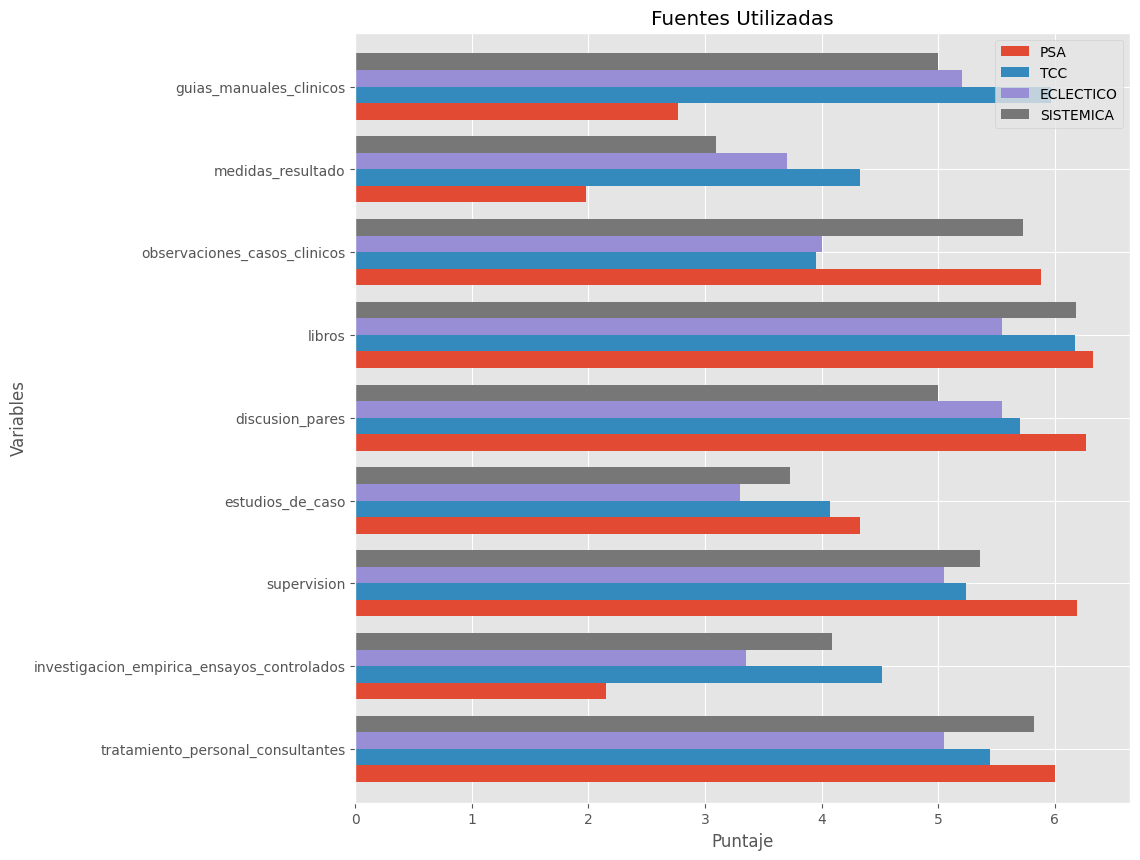

In [102]:
ax = df3.plot(kind='barh', figsize=(10,10), width=0.8)

ax.set_xlabel('Puntaje')
ax.set_ylabel('Variables')
ax.set_title('Fuentes Utilizadas')
plt.show()

## Cuarta Sección

* 'apertura_terapias_desarrolladas_por_investigadores'

* 'actualizacion_info_cientifica'

* 'formacion_enfasis_investigacion'

* 'supervisores_terapia_evidencia_requerimiento'

* 'tratamientos_cientificos_eficientes'

* 'atraer_consultantes_con_tbe'

* 'hallazgos_cientificos_practica_diaria'

* 'nueva_terapia_intento'

* 'interes_aprender_tbe'

* 'tratamientos_utilizados_base_empirica'

* 'complejidad_consultantes_ensayos_clinicos'

* 'consultantes_prefieren_otros_tratamientos'

* 'terapia_manualizada'

* 'diagnosticos_utilizados_son_simples'

* 'tratamientos_preferencia_no_probados_ensayo_controlado'

* 'enfoque_tratamiento_individual'

* 'no_tiempo_aprender_tbe'

* 'capacitacion_tbe_demasiado_dinero'

* 'no_saber_tbe'

* 'entrenamiento_clinico_no_info_tbe'

* 'alianza_terapeutica_mas_importante'

* 'terapias_igualmente_efectivas'

* 'empleador_no_fondos_capacitacion_tbe'

* 'exp_clinica_+imp_que_evidencia_cientifica'

## Puntaje con 8

* 'actualizacion_info_cientifica'

* 'formacion_enfasis_investigacion'

* 'supervisores_terapia_evidencia_requerimiento'

* 'tratamientos_cientificos_eficientes'

* 'atraer_consultantes_con_tbe'

* 'hallazgos_cientificos_practica_diaria'

* interes_aprender_tbe

* tratamientos_utilizados_base_empirica

* complejidad_consultantes_ensayos_clinicos

* consultantes_prefieren_otros_tratamientos

* no_tiempo_aprender_tbe

* capacitacion_tbe_demasiado_dinero

* no_saber_tbe

* entrenamiento_clinico_no_info_tbe

* empleador_no_fondos_capacitacion_tbe

**INFO RESPUESTAS**

0 = No sabe no contesta

1 = Muy en desacuerdo

4 = Ni de acuerdo ni en desacuerdo

7 = Muy de acuerdo

8 = No aplica la pregunta, ya que no considero que haya UN tipo de método científico

### PSA

In [103]:
fourth_section_psa = psa[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

### TCC

In [104]:
fourth_section_tcc = tcc[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

### ECLECTICO

In [105]:
fourth_section_eclectico = eclectico[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

### SISTEMICA

In [106]:
fourth_section_sist = sist[['apertura_terapias_desarrolladas_por_investigadores',
                        'nueva_terapia_intento','terapia_manualizada',
                         'diagnosticos_utilizados_son_simples','tratamientos_preferencia_no_probados_ensayo_controlado',
                         'enfoque_tratamiento_individual','alianza_terapeutica_mas_importante',
                         'terapias_igualmente_efectivas','exp_clinica_+imp_que_evidencia_cientifica',
                          'actualizacion_info_cientifica',
                         'formacion_enfasis_investigacion','supervisores_terapia_evidencia_requerimiento',
                         'atraer_consultantes_con_tbe',
                         'hallazgos_cientificos_practica_diaria','interes_aprender_tbe',
                         'tratamientos_utilizados_base_empirica','complejidad_consultantes_ensayos_clinicos',
                         'consultantes_prefieren_otros_tratamientos',
                         'no_tiempo_aprender_tbe','capacitacion_tbe_demasiado_dinero',
                         'no_saber_tbe','entrenamiento_clinico_no_info_tbe',
                         'empleador_no_fondos_capacitacion_tbe']].mean()

# DF para Cuarta Section

In [107]:
# dataframe for 3rd section
df4 = {
    'PSA': fourth_section_psa.round(2),
    'TCC': fourth_section_tcc.round(2),
    'ECLECTICO': fourth_section_eclectico.round(2),
    'SISTEMICA': fourth_section_sist.round(2)
}

df4 = pd.DataFrame(df4)
df4

,PSA,TCC,ECLECTICO,SISTEMICA
apertura_terapias_desarrolladas_por_investigadores,4.33,5.83,5.90,6.36
nueva_terapia_intento,4.08,4.67,4.45,3.09
terapia_manualizada,4.46,2.99,4.15,4.36
diagnosticos_utilizados_son_simples,3.46,3.69,4.35,2.55
tratamientos_preferencia_no_probados_ensayo_controlado,3.21,1.62,2.10,2.00
enfoque_tratamiento_individual,5.33,4.89,5.45,4.00
alianza_terapeutica_mas_importante,3.60,3.23,4.10,4.82
terapias_igualmente_efectivas,3.21,1.57,2.70,2.82
exp_clinica_+imp_que_evidencia_cientifica,4.81,2.63,4.35,3.00
actualizacion_info_cientifica,3.60,5.81,5.40,5.00


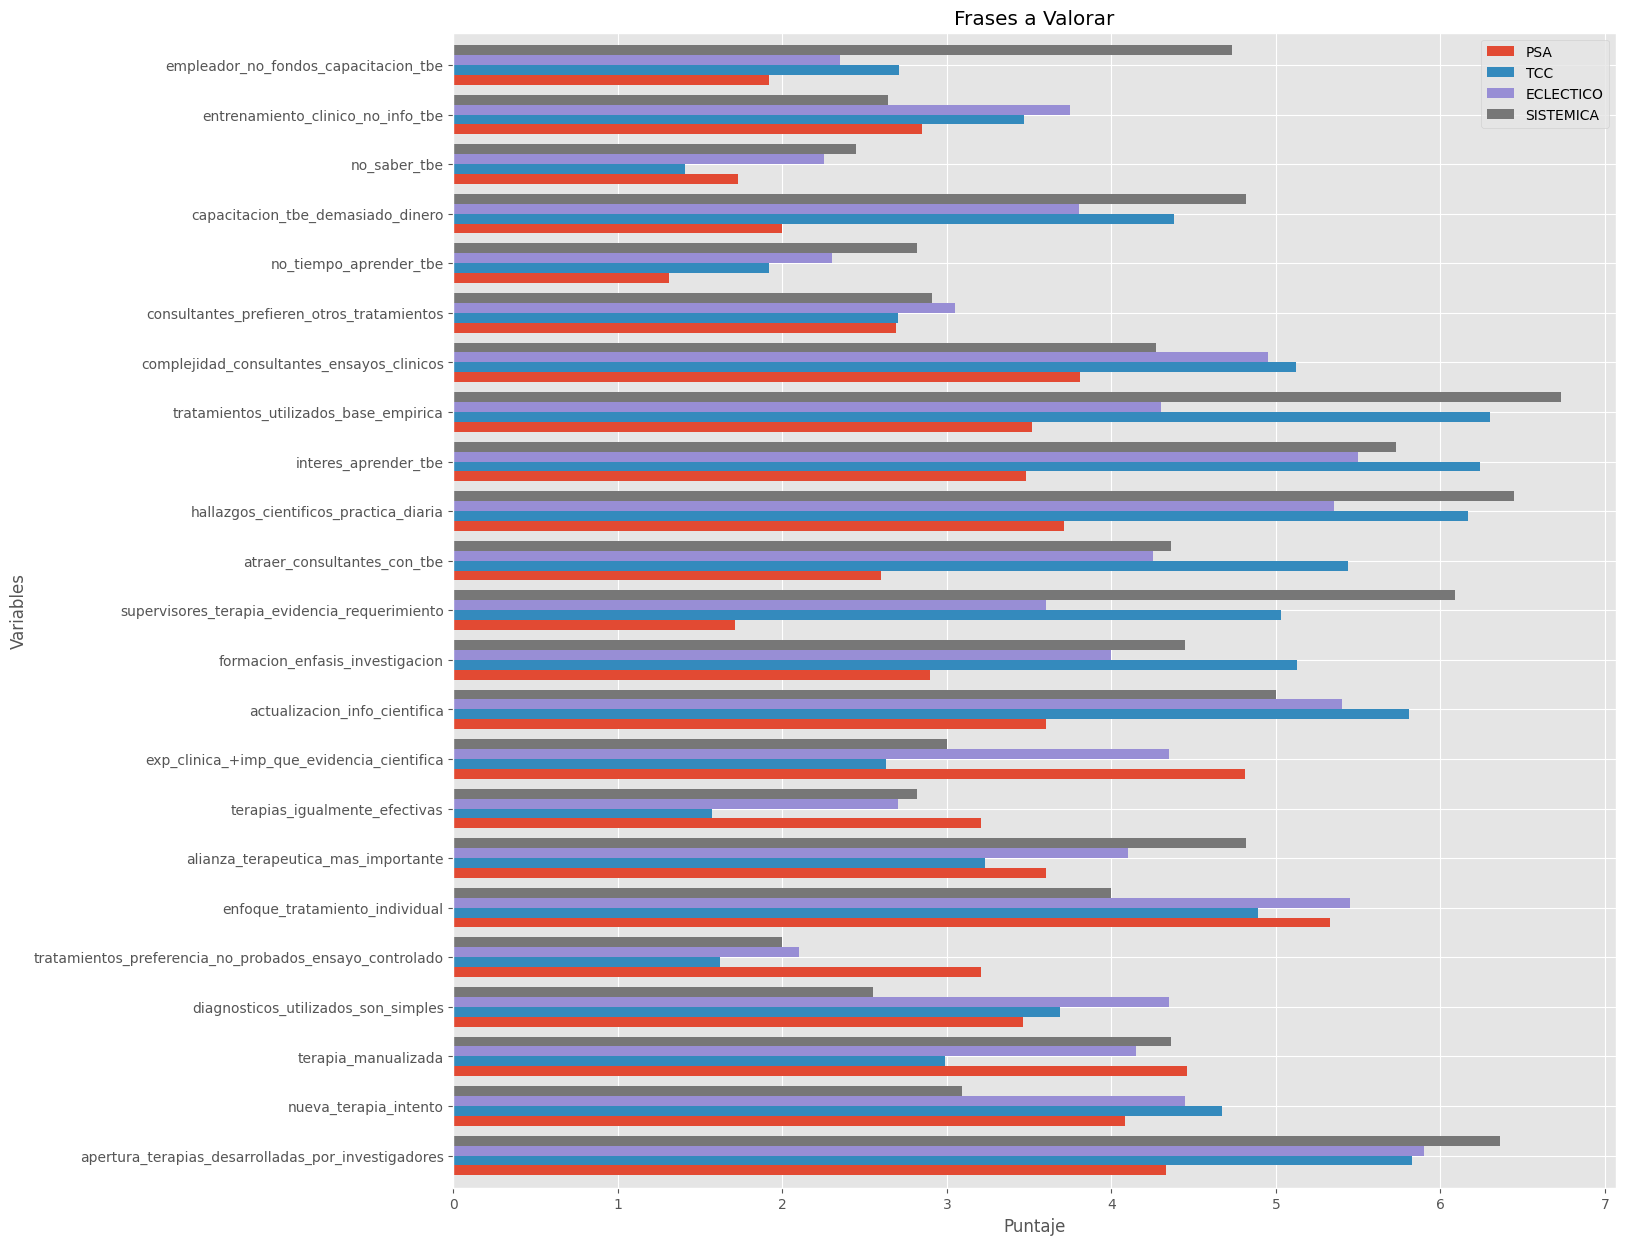

In [108]:
ax = df4.plot(kind='barh', figsize=(15,15), width=0.8)

ax.set_xlabel('Puntaje')
ax.set_ylabel('Variables')
ax.set_title('Frases a Valorar')
plt.show()

## Consentimiento Informado

In [109]:
ci_psa = psa['consentimiento_informado'].mean()
ci_tcc = tcc['consentimiento_informado'].mean()
ci_eclectico = eclectico['consentimiento_informado'].mean()
ci_sist = sist['consentimiento_informado'].mean()

print('CI PSA:',ci_psa)
print('CI TCC:',ci_tcc)
print('CI ELECTICO:',ci_eclectico)
print('CI SISTEMICA:',ci_sist)

CI PSA: 5.909090909090909
CI TCC: 6.022222222222222
CI ELECTICO: 5.176470588235294
CI SISTEMICA: 6.636363636363637


# ANÁLISIS ESTADÍSTICO